## Incomplete markets model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
util = lambda x: ( x**(1 - sig) - 1 )/ (1- sig)

In [3]:
def pars():
    global w, r, sig, delta, alfa, beta, pi, n_y, n_a, a_grid, \
    y_grid, V
    
    w, r = 1, 0.05
    
    sig, delta, alfa, beta = 2, 0.08, 0.44, 0.98
    
    pi = np.array(([0.4, 0.5, 0.1],
                  [0.3, 0.2, 0.5],
                  [0.2, 0.2, 0.6]))
    
    y_min, y_max, n_y = 1, 3, len(pi)
    y_grid = np.linspace(y_min, y_max, n_y)
    
    a_min, a_max, n_a = 0, 5, 3
    a_grid = np.linspace(a_min, a_max, n_a)
    V = np.zeros((n_y, n_a)) 
    

pars()
    

In [4]:

def obj_f(V):
    obj = np.zeros((n_y, n_a, n_a))
    
    for i_y, y in enumerate(y_grid):
        for i_a, a in enumerate(a_grid):
            for i_aa, aa in enumerate(a_grid):
                c = w*y + (1 + r)*a - aa
                
                if c <= 0:
                    obj[i_y, i_a, i_aa] = -np.inf
                else:
                    obj[i_y, i_a, i_aa] = util(c) + \
                    beta*np.dot(pi[i_y, :], V[:, i_aa])
    return obj




In [5]:
def Tv_f(obj):
    Tv = np.zeros((n_y, n_a))
    Tg = np.zeros((n_y, n_a), dtype=np.int)
    
    for i_y in range(n_y):
        for i_a in range(n_a):
            Tv[i_y, i_a] = np.max(obj[i_y, i_a, :])
            Tg[i_y, i_a] = np.argmax(obj[i_y, i_a, :])
    return Tv, Tg



In [6]:
def solve1():
    global V
    norma, tol = 1, 1e-6
    while norma > tol:
        obj = obj_f(V)
        Tv, Tg = Tv_f(obj)

        norma = np.max(np.abs(Tv - V))
        V = np.copy(Tv)
        iG = np.copy(Tg)
       # print(f'Norma = {norma}')
    return V, iG
    
V, iG = solve1()

In [7]:
def M_f(iG):
    
    M = np.zeros((n_a*n_y, n_a*n_y))
    
    for i_y in range(n_y):
        for i_a in range(n_a):
            
            c_state = i_y*n_a + i_a
            
            for i_yy in range(n_y):
                for i_aa in range(n_a):
                    
                    n_state = i_yy*n_a + i_aa
                    
                    if iG[i_y, i_a] == i_aa:
                        
                        M[c_state, n_state] = pi[i_y, i_yy]
                        
    return M
    
M = M_f(iG)

In [8]:
def barM_f(M):
    
    barM = np.ones(n_a*n_y)/(n_a*n_y)    
    norma, tol = 1, 1e-6
    
    while norma>tol:        
        T_barM = np.dot(barM, M)
        norma = np.max(np.abs(T_barM - barM))
        barM = np.copy(T_barM)
        
    return barM


barM = barM_f(M)

In [9]:
def poup_f():
    Ea = 0
    for i_y in range(n_y):
        for i_a in range(n_a):
           
            s_ind = iG[i_y, i_a]
            poup = a_grid[s_ind]

            t_ind = i_y*n_a + i_a
            dist_stat = barM[t_ind]

            Ea += poup*dist_stat
    return Ea
    

In [10]:
def trab_f():
    L = 0 
    for i_y in range(n_y):
        for i_a in range(n_a):
            ofer_t = y_grid[i_y]
            
            t_ind = i_y*n_a + i_a
            dist_stat = barM[t_ind]
            
            L += ofer_t*dist_stat
    return L

In [11]:
def dist_f(r):
    
    k = (alfa/(r + delta))**(1 / (1- alfa) ) 
    w = (1 - alfa)*(k**alfa)
    
    V, iG = solve1()
    M = M_f(iG)
    barM = barM_f(M)
    
    Ea = poup_f()
    L = trab_f()
        
    K = k*L
    
    d = K - Ea
    return d

In [12]:
pars()
r_grid = np.arange(0, 1, 0.01)
d_grid = dist_f(r_grid)

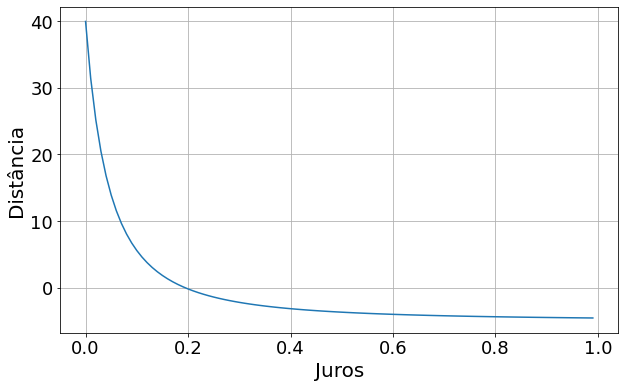

In [13]:
plt.subplots(figsize=(10,6))
plt.plot(r_grid, d_grid)
plt.xlabel('Juros', fontsize=20)
plt.ylabel('Distância', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)


In [61]:
def solve2():
    print('Calculando o SS final...')
    norma, tol = 1, 1e-6
    
    r_l, r_h = -1, 7
    while norma>tol:
        r_bar = (r_l + r_h)*0.5
        
        if dist_f(r_bar) > 0:
            r_l = r_bar
        else:
            r_h = r_bar
        norma = np.abs(r_h - r_l)
    
        print(f'd = {np.around(dist_f(r_bar), 4 ):.<10} norma = {np.around(norma, 4 ):.<10} r = {np.around(r_l, 4)}')
    
    
    

In [62]:
pars()
solve2()

Calculando o SS final...
d = -4.9336... norma = 4.0....... r = -1
d = -4.5688... norma = 2.0....... r = -1
d = 39.9852... norma = 1.0....... r = 0.0
d = -3.6916... norma = 0.5....... r = 0.0
d = -1.4182... norma = 0.25...... r = 0.0
d = 3.3813.... norma = 0.125..... r = 0.125
d = 0.2112.... norma = 0.0625.... r = 0.1875
d = -0.7219... norma = 0.0312.... r = 0.1875
d = -0.2912... norma = 0.0156.... r = 0.1875
d = -0.0499... norma = 0.0078.... r = 0.1875
d = 0.078..... norma = 0.0039.... r = 0.1914
d = 0.0134.... norma = 0.002..... r = 0.1934
d = -0.0184... norma = 0.001..... r = 0.1934
d = -0.0025... norma = 0.0005.... r = 0.1934
d = 0.0054.... norma = 0.0002.... r = 0.1936
d = 0.0015.... norma = 0.0001.... r = 0.1937
d = -0.0005... norma = 0.0001.... r = 0.1937
d = 0.0005.... norma = 0.0....... r = 0.1938
d = -0.0...... norma = 0.0....... r = 0.1938
d = 0.0002.... norma = 0.0....... r = 0.1938
d = 0.0001.... norma = 0.0....... r = 0.1938
d = 0.0....... norma = 0.0....... r = 0.1938
d =